In [1]:
import torch
from models.GFN import ImageGFN
import os
from glob import glob

In [2]:
n_channels = 3
output_dim = 8

model = ImageGFN(n_channels=n_channels, output_dim=output_dim, num_gaussians=8)
state_dict = torch.load(os.path.join("../logs/iwildcam_pretrain", "model.pth"))
model.load_state_dict(state_dict)
model.eval()

/Users/psoni/miniconda3/envs/gflowaug/lib/python3.9/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


ImageGFN(
  (feature_model): FeatureExtractor(
    (model): Sequential(
      (0): Conv2d(5, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): LeakyReLU(negative_slope=0.01)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): LeakyReLU(negative_slope=0.01)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Flatten(start_dim=1, end_dim=-1)
      (7): LazyLinear(in_features=0, out_features=1752, bias=True)
    )
  )
)

In [3]:
images = glob("../data/iwildcam_v2.0/train/*.jpg")[:5]
print(images)

['../data/iwildcam_v2.0/train/8ca32298-21bc-11ea-a13a-137349068a90.jpg', '../data/iwildcam_v2.0/train/9713f0ae-21bc-11ea-a13a-137349068a90.jpg', '../data/iwildcam_v2.0/train/957648b4-21bc-11ea-a13a-137349068a90.jpg', '../data/iwildcam_v2.0/train/99360002-21bc-11ea-a13a-137349068a90.jpg', '../data/iwildcam_v2.0/train/8bd2517c-21bc-11ea-a13a-137349068a90.jpg']


In [36]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

tensors = []
ims = []
transform = transforms.Compose([transforms.CenterCrop(448),
                                transforms.ToTensor()])
reverse =  transforms.ToPILImage()

for file_name in images:
    with Image.open(file_name) as im:
        tensors.append(transform(im))

In [49]:
outputs = []
n = 3
for t in tensors:
    out = []
    for i in range(n):
        out.append(model(t))
    outputs.append(out)

In [52]:
reverse(outputs[0][0]).show()

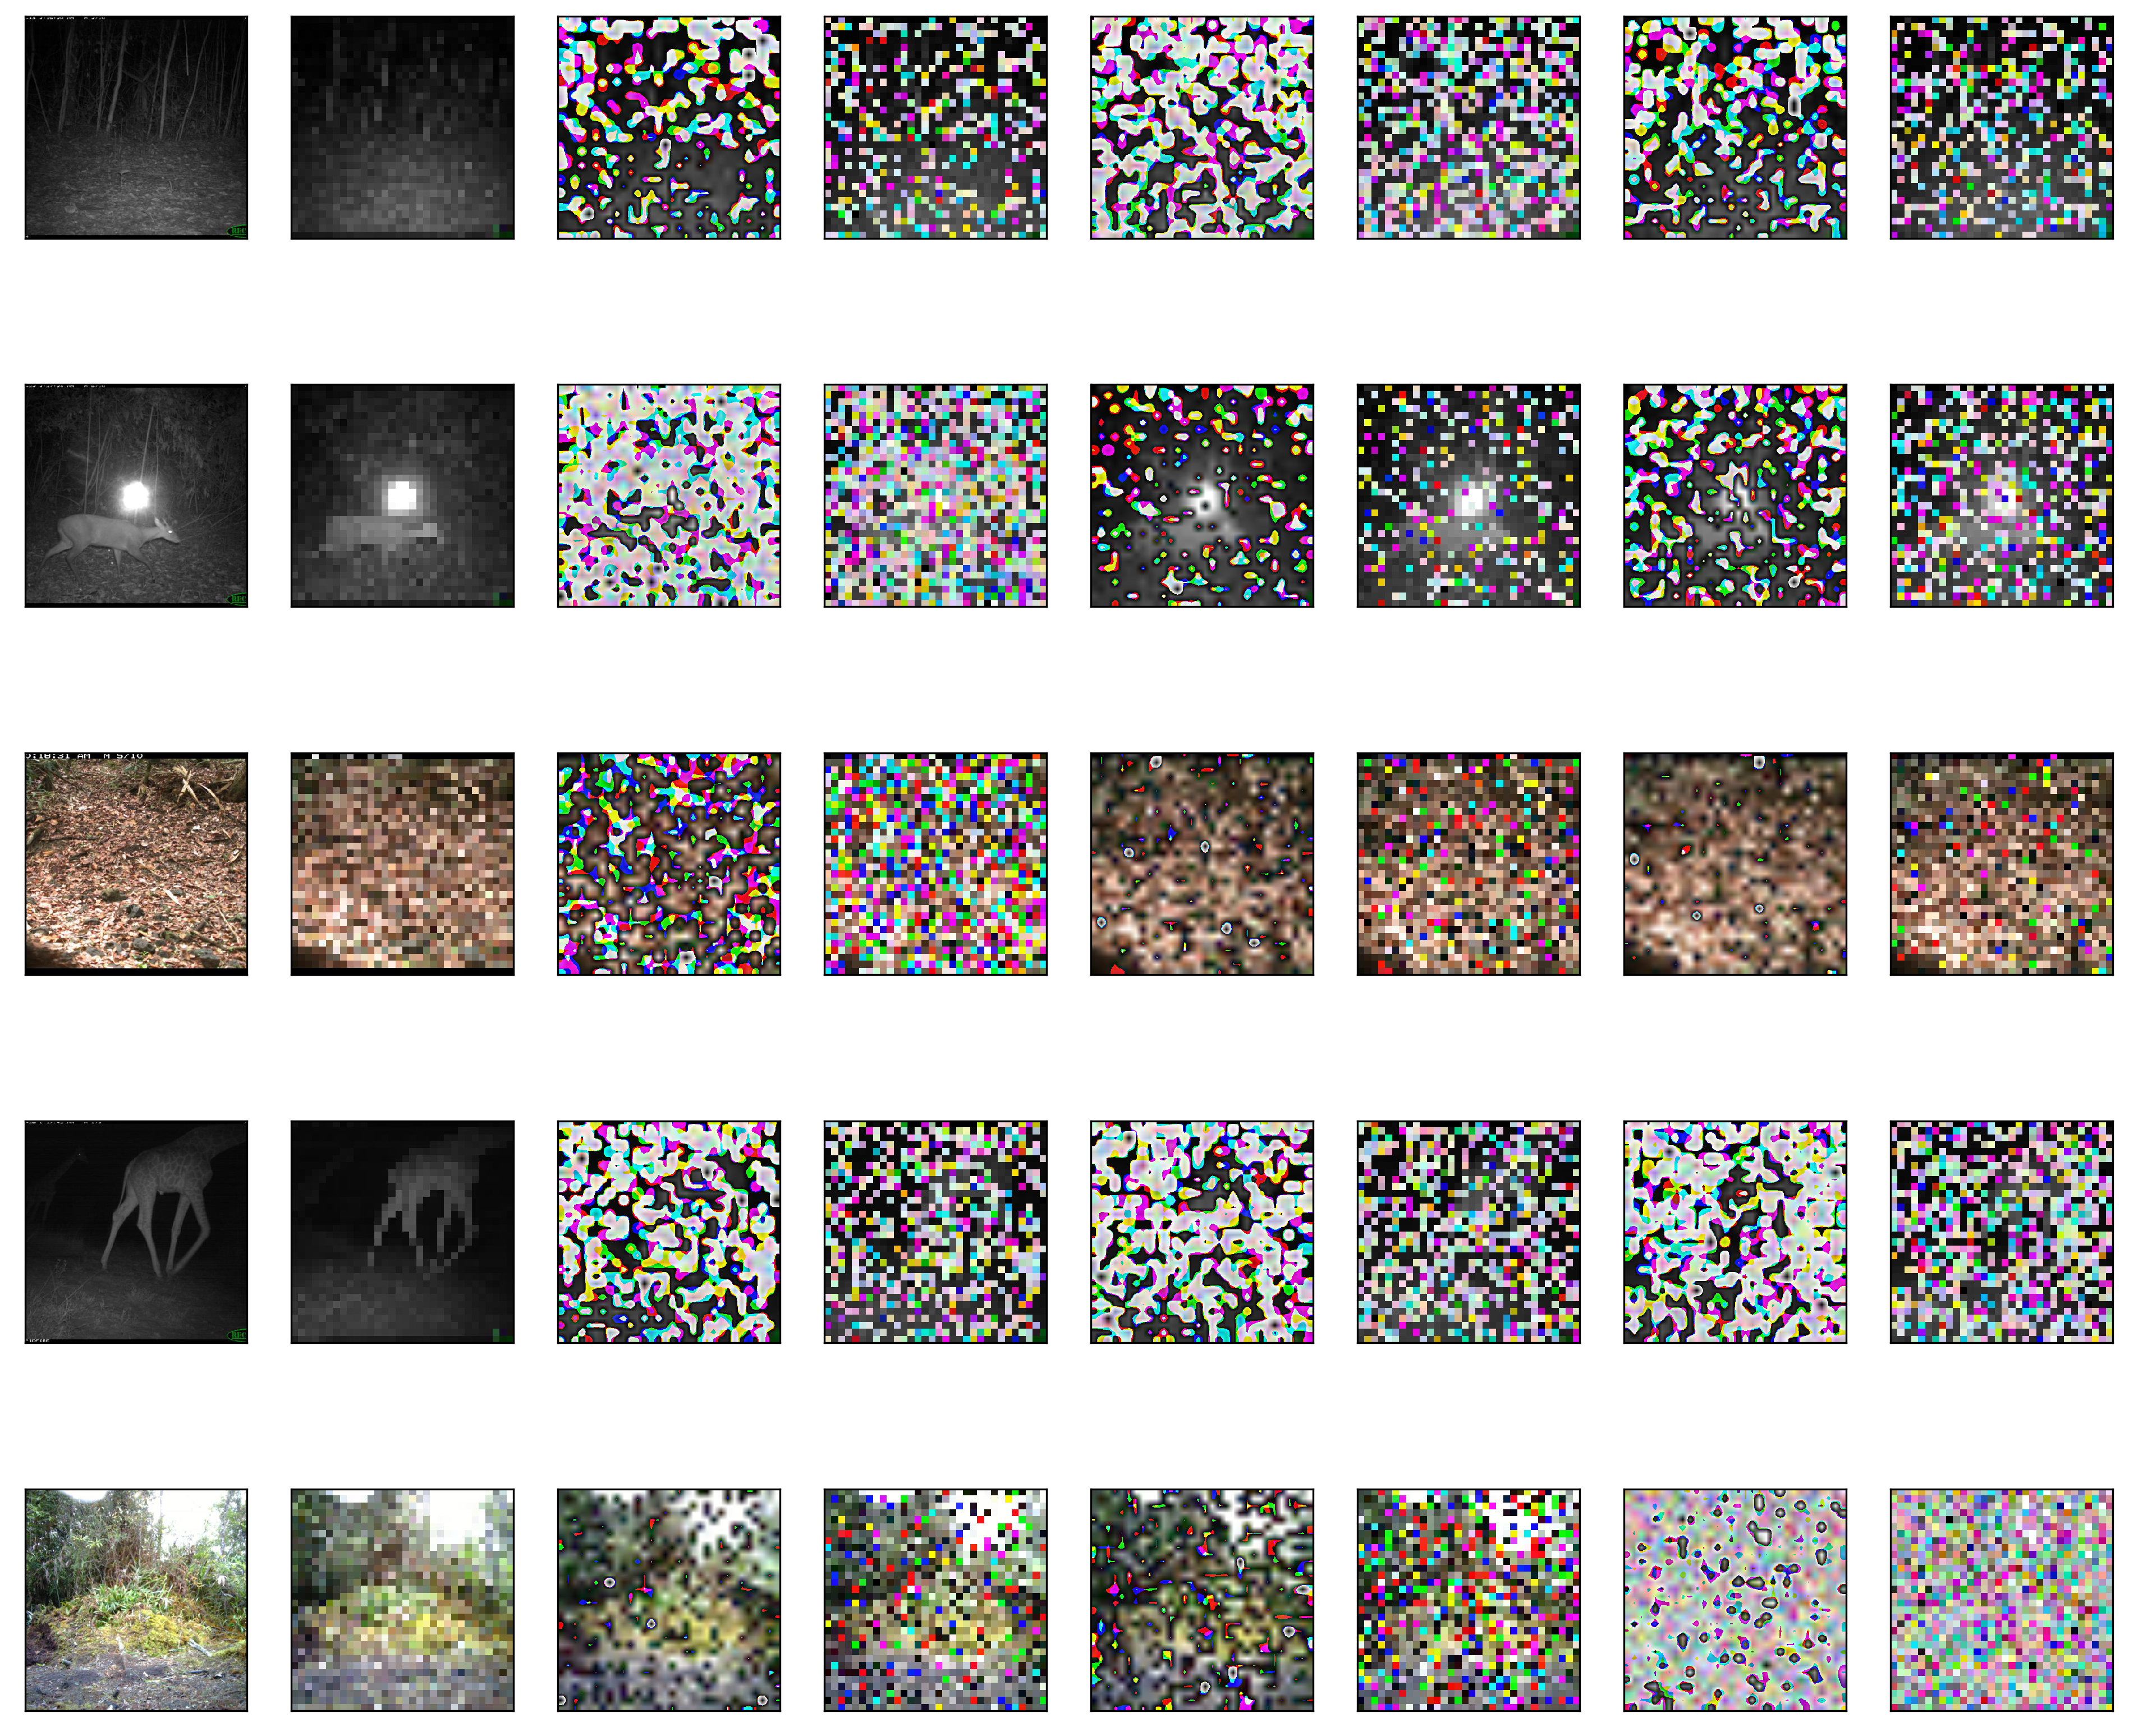

In [59]:
from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import ImageGrid



flattened = []
upsample = transforms.Resize(448)
downsample = transforms.Resize(32)


for i,t in enumerate(tensors):
    flattened.append(reverse(t))
    flattened.append(reverse(downsample(t)))
    for out in outputs[i]:
        flattened.append(reverse(upsample(out)))
        flattened.append(reverse(out))

figure(num=None, figsize=(16, 14), dpi=300)
k=1
for i in range(5):
    for j in range(8):
        plt.subplot(5,8,k,xticks=[],yticks=[])
        plt.imshow(flattened[k-1],interpolation='none')
        k=k+1

plt.savefig("examples.png")